# NEXT GENERATION MUSIC PREDICTOR SYSTEM 

* Problem Statement: NextGen Music system will predict how popular a new song will be. We are trying to investigate how old songs can be used to predict the popularity of the new songs based on the features of the song and their past popularity on old songs from 1991-2018. We will focus on few points like certain characteristics for hit songs and does the new song fall under this hit criteria.It can help a music company to decide the features/genre of the new music album so that it has high chances of success.

* Below we are importing all the necesasary packages required for the analysis and operations.

In [1]:

# Numpy and Pandas
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Prediction
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_score, GridSeachCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier # Validation


import itertools
import copy
# Classifiers

from sklearn import svm
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Data prepping
from sklearn.preprocessing import LabelEncoder


* Data Set: We have used Spotify data set for the analysis. Data set containing audio data from 1991- 2018 and 3 listener data set. Now we have merged the data of 27 years into one combined file named  "combined.csv" which we are reading on the notebook below.

In [2]:
#Reading the merged file
music = pd.read_csv('C:/Users/saiprasad/Desktop/Project/Spotify_/combined_csv.csv')

C:\Users\saiprasad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


* We are able to see the number of rows and columns present in Dataset.

In [3]:
#getting head
music.head()
#getting dimensions
music.shape

(530241, 26)

* Null values are calculated for every caregory in the dataset

In [4]:
#calculates no of null values for each category in dataset
music.isnull().sum()

Unnamed: 0              0
acousticness            1
album_id                1
album_name              1
analysis_url            1
artist_ids              1
artist_names            1
danceability            3
disc_number             1
duration_ms             1
energy                  1
instrumentalness        1
key                     1
liveness                1
loudness                1
mode                    1
popularity              1
preview_url         70211
song_id                 1
song_name               1
speechiness             3
tempo                   1
time_signature          3
track_href              1
track_number            1
valence                 3
dtype: int64

In [5]:
#As we can see we have null values, we can remove then as they are few
music_backup=music
#Drop null values
music=music.dropna()
#Check for null
music.isnull().sum()
#Save as csv
#music.to_csv('music.csv',index=False)
#music.head()

Unnamed: 0          0
acousticness        0
album_id            0
album_name          0
analysis_url        0
artist_ids          0
artist_names        0
danceability        0
disc_number         0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
preview_url         0
song_id             0
song_name           0
speechiness         0
tempo               0
time_signature      0
track_href          0
track_number        0
valence             0
dtype: int64

* We will be dropping  unnecessary columns (Attributes) which are not required for our analysis.

In [6]:
#drop the unecessary columns
music=music.drop(['Unnamed: 0','album_id','artist_ids','song_name','artist_names','album_name','analysis_url','artist_names','disc_number','duration_ms','preview_url','song_id','time_signature','track_href','track_number'], axis=1)


* Calculation of mean is done and this is the most important part as we will be considering the Song hit prediction based on the mean value of the popularity attribute.

In [7]:
#calculating the mean of popularity
pop_mean=music["popularity"].mean()
pop_mean

8.848448355317503

* The obtained Mean value for the "Popularity Attribute" for the dataset is ( 8.85 ).

* Sorting the data based on the " Popularity Attribute " which has popularity value greater than the Mean value of the dataset. Where "1" and "0" are named as the indicator wheather it is greater than mean or not. If it is 1 then True it is greater, else "0" and new attribute is generated as "Popularity_Factor".

In [8]:
# making a series where true is entered if popularity value>mean else False
popularity_factor=music["popularity"]>pop_mean
#adding popularity factor as a column to the music dataframe with values as 0 and 1
music["Popularity_factor"]=popularity_factor.astype(int)
music.head()


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,Popularity_factor
2,0.0468,0.737,0.801,0.888000,0.0,0.1050,-9.058,1.0,18.0,0.0344,145.003,0.8590,1
3,0.9480,0.340,0.265,0.815000,8.0,0.0899,-7.477,1.0,18.0,0.0284,110.588,0.0866,1
4,0.6300,0.587,0.493,0.000000,8.0,0.2240,-8.368,1.0,53.0,0.0296,131.727,0.2100,1
5,0.0424,0.853,0.686,0.000003,10.0,0.0866,-8.314,0.0,48.0,0.2680,122.970,0.5380,1
6,0.7430,0.659,0.407,0.000000,4.0,0.0784,-9.718,0.0,62.0,0.0353,119.321,0.2690,1


In [9]:
feature_cols=['acousticness','danceability','energy','instrumentalness','key','liveness','loudness','speechiness','tempo','valence']
target_col=['Popularity_factor']

In [10]:
#as we can see that mode is the least important feature(score<0.05) and is not appropriate to keep. we will remove made
####feature_cols=['acousticness','danceability','energy','instrumentalness','mode','key','liveness','loudness','speechiness','tempo','valence']
####target_col=['Popularity_factor']
####X=X.drop(['mode'],axis=1)
X=music[feature_cols]
Y=music['Popularity_factor']

* Splitting up of test and train data by using cross validation on the "Popularity_Factor"

In [11]:
#Test Train Split using cross validation
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(322019, 10)
(138009, 10)


* We are applying "Logistic Regression" on the Test and Train data to predict wheather the future songs  would be a "Hit" or a "Not Hit".

In [12]:
#Training and Predicting
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

C:\Users\saiprasad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* Evaluating the model with confusion matrix and classification Report for "Logistic Regression Model".

In [13]:
#Evaluation
from sklearn.metrics import classification_report
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("Confusion Matrix:")
print(matrix)
report = classification_report(Y_test, predicted)
print("Classification Report:")
print(report)
accuracy=np.mean(predicted==Y_test)
print("Accuracy is: ",accuracy)

#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#The recall is the ratio t / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
#The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
#The support is the number of occurrences of each class in y_true.

Confusion Matrix:
[[78862  6389]
 [43974  8784]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.93      0.76     85251
           1       0.58      0.17      0.26     52758

   micro avg       0.64      0.64      0.64    138009
   macro avg       0.61      0.55      0.51    138009
weighted avg       0.62      0.64      0.57    138009

Accuracy is:  0.6350745241252382


* The Prediction Accuracy obtained by "Logistic Regression model"  on the dataset is  63.5 %

* Plotting the Confusion matrix "Without Normalization" and with "Normalization".

Confusion matrix, without normalization
[[78862  6389]
 [43974  8784]]
Normalized confusion matrix
[[0.93 0.07]
 [0.83 0.17]]


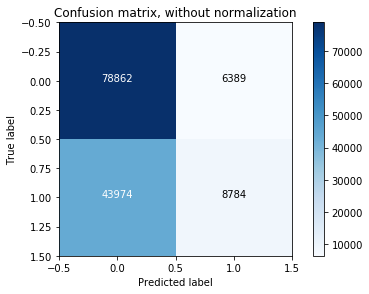

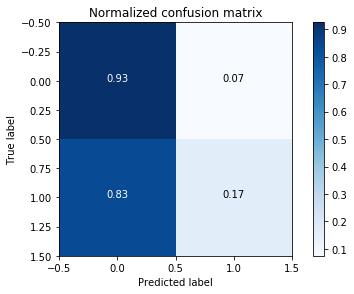

In [14]:
#plotting the evaluation

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

* We are applying "Random Forest" on the Test and Train data to predict wheather the future songs  would be a "Hit" or a "Not Hit".

In [15]:
# Build a forest
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
fnames = [feature_cols[i] for i in indices]


* Predicting the accuracy for "Random Forest" Model.

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)

#fit the data
rfc.fit(X_train,Y_train)

Y_pred_rfc=rfc.predict(X_test)

matrix_rfc = confusion_matrix(Y_test, Y_pred_rfc)

In [20]:
#Evaluation
from sklearn.metrics import classification_report
#predicted = model.predict(X_test)
#matrix = confusion_matrix(Y_test, predicted)
print("Confusion Matrix:")
print(matrix_rfc)
report_rfc = classification_report(Y_test, Y_pred_rfc)
print("Classification Report:")
print(report_rfc)
accuracy_rfc=np.mean(Y_pred_rfc==Y_test)
print("Accuracy for rfc: ",accuracy_rfc)

Confusion Matrix:
[[80916  4335]
 [ 9103 43655]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     85251
           1       0.91      0.83      0.87     52758

   micro avg       0.90      0.90      0.90    138009
   macro avg       0.90      0.89      0.89    138009
weighted avg       0.90      0.90      0.90    138009

Accuracy for rfc:  0.9026295386532762


* The Prediction Accuracy obtained by "Random Forest" model on the dataset is  90.1 %

Confusion matrix, without normalization
[[80916  4335]
 [ 9103 43655]]
Normalized confusion matrix
[[0.95 0.05]
 [0.17 0.83]]


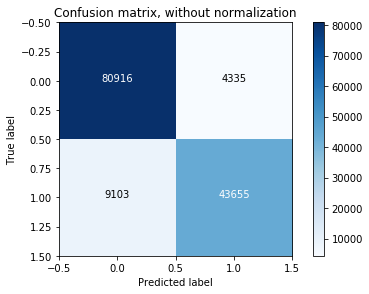

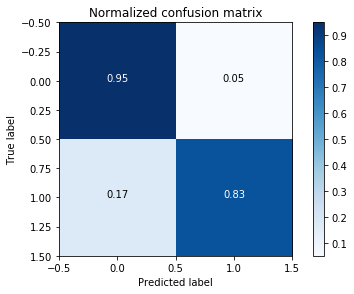

In [18]:
matrix_rfc = confusion_matrix(Y_test, Y_pred_rfc)
 

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_rfc,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_rfc, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

* We are applying "K-Nearest Neigbor" on the Test and Train data to predict wheather the future songs  would be a "Hit" or a "Not Hit".

In [19]:
#knn
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=100,weights='uniform')
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [21]:
#knn prediction
Y_pred_knn=knn.predict(X_test)

matrix_knn = confusion_matrix(Y_test, Y_pred_knn)

In [22]:
#Evaluation
from sklearn.metrics import classification_report
#predicted = model.predict(X_test)
#matrix = confusion_matrix(Y_test, predicted)
print("Confusion Matrix:")
print(matrix_knn)
report_knn = classification_report(Y_test, Y_pred_knn)
print("Classification Report:")
print(report_knn)
accuracy_knn=np.mean(Y_pred_knn==Y_test)
print("Accuracy for rfc: ",accuracy_knn)

Confusion Matrix:
[[74299 10952]
 [39441 13317]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.87      0.75     85251
           1       0.55      0.25      0.35     52758

   micro avg       0.63      0.63      0.63    138009
   macro avg       0.60      0.56      0.55    138009
weighted avg       0.61      0.63      0.59    138009

Accuracy for rfc:  0.6348571469976596


* The Prediction Accuracy obtained by "K-Nearest Neighbor" model on the dataset is  63.48%

Confusion matrix, without normalization
[[74299 10952]
 [39441 13317]]
Normalized confusion matrix
[[0.87 0.13]
 [0.75 0.25]]


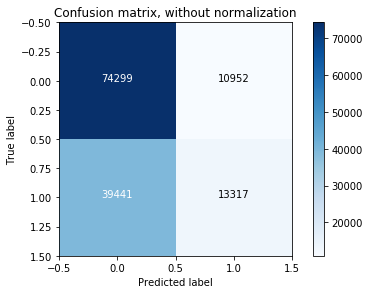

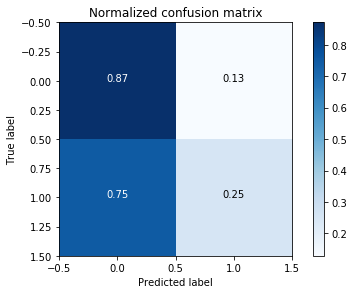

In [23]:
matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
 

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_knn,
                      title='Confusion matrix, without normalization')
 
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix_knn, normalize=True,
                      title='Normalized confusion matrix')
 
plt.show()

* Cross- validation accuracy for every model is shown below.

In [24]:
# Random forest with cv
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X, Y, scoring='accuracy', cv=5)
print (scores)
print (scores.mean())
scores_random_Forest=scores.mean()
print(scores_random_Forest)

[0.98 0.98 0.98 0.98 0.98]
0.9818141511126616
0.9818141511126616


In [25]:
#LOgistic with CV

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=5)
print (scores)
print (scores.mean())
scores_lr=scores.mean()
print(scores_lr)

C:\Users\saiprasad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saiprasad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saiprasad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saiprasad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saiprasad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

[0.64 0.64 0.62 0.64 0.62]
0.6320788780090053
0.6320788780090053


In [26]:
#KNN with CV

#from sklearn.model_selection import cross_val_score
scores_knn = cross_val_score(knn, X, Y, scoring='accuracy', cv=5)
print (scores_knn)
print (scores_knn.mean())

[0.64 0.64 0.62 0.65 0.62]
0.6342874412732161


* Plotting the Accuracies for the model KNN, Logistic Regression and Random Forest.

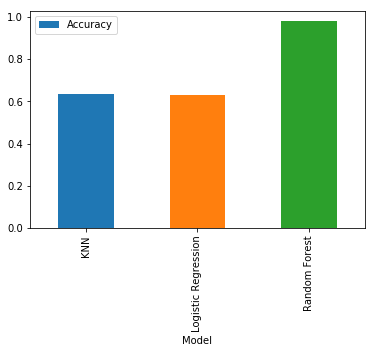

In [27]:
d = {'Model':['KNN','Logistic Regression','Random Forest'],'Accuracy':[scores_knn.mean(),scores_lr,scores_random_Forest]}

agg_scores = pd.DataFrame(data = d)
agg_scores.plot(x='Model',y='Accuracy',kind='bar')

In [28]:
#Random forest confusion matrix with CV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
Y_pred_rfc_cv = cross_val_predict(rfc,X,Y,cv=5)



In [30]:
print('Confusion Matrix')
matrix_rfc_cv = confusion_matrix(Y, Y_pred_rfc_cv)
print(matrix_rfc_cv)
report_rfc = classification_report(Y, Y_pred_rfc_cv)
print("Classification Report:")
print(report_rfc)
accuracy_rfc_cv=np.mean(Y_pred_rfc_cv==Y)
print("Accuracy for rfc: ",scores_random_Forest)

Confusion Matrix
[[280706   3576]
 [  4719 171027]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    284282
           1       0.98      0.97      0.98    175746

   micro avg       0.98      0.98      0.98    460028
   macro avg       0.98      0.98      0.98    460028
weighted avg       0.98      0.98      0.98    460028

Accuracy for rfc:  0.9818141511126616


* As you can see Accuracy of the Random Forest model is higher with 98% as compared to Logistic regression and K- Nearest Neighbor. So Random Forest Model is the most optimal and Highly Accurate model for our Prediction.

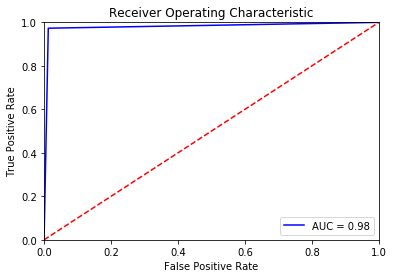

In [31]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(Y,Y_pred_rfc_cv)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()